In [19]:
import pandas as pd
from scipy import stats
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
import regex as re


In [20]:
def rellenar_nan_con_random_normal(arr):
    # Encuentra los índices de los valores NaN
    nan_indices = np.isnan(arr)
    
    # Calcula el valor mínimo y máximo del array (excluyendo los NaN)
    min_val = np.nanmin(arr)
    max_val = np.nanmax(arr)
    
    # Genera números aleatorios siguiendo una distribución normal
    mean = (min_val + max_val) / 2
    std_dev = (max_val - min_val) / 6  # Aproximadamente el 99.7% de los valores caerán entre min y max
    
    random_values = np.random.normal(loc=mean, scale=std_dev, size=nan_indices.sum())
    
    # Asegura que los valores estén dentro del rango [min_val, max_val]
    random_values = np.clip(random_values, min_val, max_val)
    
    # Rellena los NaN con los valores aleatorios generados
    arr[nan_indices] = random_values
    
    return arr

def rellenar_nan_con_random_gamma(arr,datos_limpios):
    # Encuentra los índices de los valores NaN
    nan_indices = np.isnan(arr)
    
    # Calcula el valor mínimo y máximo del array (excluyendo los NaN)
    min_val = np.nanmin(arr)
    max_val = np.nanmax(arr)
    
    # Define los parámetros de la distribución Gamma
    shape, loc, scale = stats.gamma.fit(datos_limpios)
    
    # Genera números aleatorios siguiendo una distribución Gamma
    random_values = np.random.gamma(shape, scale, size=nan_indices.sum())
    
    # Asegura que los valores estén dentro del rango [min_val, max_val]
    random_values = np.clip(random_values, min_val, max_val)
    
    # Rellena los NaN con los valores aleatorios generados
    arr[nan_indices] = random_values
    
    return arr

In [3]:
df = pd.read_csv("train.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
from typing import Concatenate


patron1 = r'Master'
patron2 = r'Mr'
patron3 = r'Mrs'
patron4 = r'Miss'
niños = df[df['Name'].str.contains(patron1)]
Mr = df[df['Name'].str.contains(patron2)]
Mrs = df[df['Name'].str.contains(patron3)]
Miss = df[df['Name'].str.contains(patron4)]

niños

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S


In [5]:
edades_niños = niños["Age"].to_numpy()
edad_max = max(edades_niños)
edad_min = min(edades_niños)
limpia_edades_niños = edades_niños[~np.isnan(edades_niños)]
limpia_edades_niños


array([ 2.  ,  2.  ,  7.  , 11.  ,  4.  ,  0.83, 12.  ,  1.  ,  9.  ,
        4.  ,  9.  ,  1.  ,  3.  ,  3.  ,  7.  ,  0.92,  2.  ,  3.  ,
        1.  ,  3.  ,  4.  ,  9.  ,  9.  ,  8.  ,  6.  ,  0.67,  8.  ,
        1.  , 11.  ,  0.42, 10.  ,  2.  ,  1.  ,  0.83,  4.  ,  4.  ])

Prueba de normalidad Anderson-Darling

In [6]:
stats.anderson(limpia_edades_niños, dist="norm")



AndersonResult(statistic=1.63500965275513, critical_values=array([0.528, 0.601, 0.721, 0.841, 1.   ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4.574166666666667, scale=3.6198716433439615)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

No sigue una distribución normal, asi que haremos una prueba para la distribución exponencial 

In [7]:
stats.anderson(limpia_edades_niños, dist="expon")


AndersonResult(statistic=0.8862672578507187, critical_values=array([0.907, 1.06 , 1.319, 1.58 , 1.925]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=4.574166666666667)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Aparantemente si sigue una distribución exponencial 

(array([10.,  4.,  4.,  5.,  1.,  2.,  2.,  4.,  1.,  3.]),
 array([ 0.42 ,  1.578,  2.736,  3.894,  5.052,  6.21 ,  7.368,  8.526,
         9.684, 10.842, 12.   ]),
 <BarContainer object of 10 artists>)

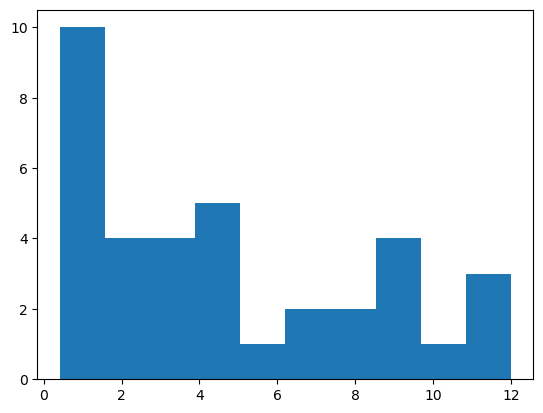

In [8]:
plt.hist(edades_niños)

In [9]:
edades_mr = Mr["Age"].to_numpy()
edad_max_mr = max(edades_mr)
edad_min_mr = min(edades_mr)
limpia_edades_mr = edades_mr[~np.isnan(edades_mr)]
limpia_edades_mr



array([22. , 38. , 35. , 35. , 54. , 27. , 14. , 20. , 39. , 55. , 31. ,
       35. , 34. , 28. , 38. , 19. , 66. , 28. , 42. , 21. , 40. , 27. ,
       18. , 21. , 49. , 29. , 65. , 28.5, 22. , 45. , 29. , 19. , 26. ,
       32. , 21. , 26. , 32. , 25. , 22. , 29. , 28. , 33. , 16. , 24. ,
       29. , 20. , 46. , 26. , 59. , 71. , 23. , 34. , 34. , 21. , 33. ,
       37. , 28. , 38. , 47. , 22. , 21. , 70.5, 29. , 24. , 21. , 32.5,
       54. , 24. , 45. , 33. , 20. , 47. , 29. , 25. , 23. , 37. , 16. ,
       24. , 24. , 19. , 18. , 19. , 27. , 36.5, 22. , 55.5, 40.5, 51. ,
       30. , 44. , 40. , 26. , 17. , 45. , 28. , 61. , 21. , 56. , 18. ,
       30. , 36. , 45. , 40. , 36. , 32. , 19. , 44. , 42. , 24. , 28. ,
       34. , 45.5, 18. , 32. , 26. , 40. , 24. , 22. , 30. , 42. , 30. ,
       16. , 27. , 51. , 38. , 22. , 19. , 20.5, 18. , 35. , 29. , 59. ,
       24. , 44. , 19. , 33. , 29. , 22. , 30. , 24. , 37. , 29. , 62. ,
       30. , 41. , 29. , 50. , 52. , 40. , 36. , 16

KstestResult(statistic=0.03696439620923608, pvalue=0.4762300735365811, statistic_location=25.0, statistic_sign=1)


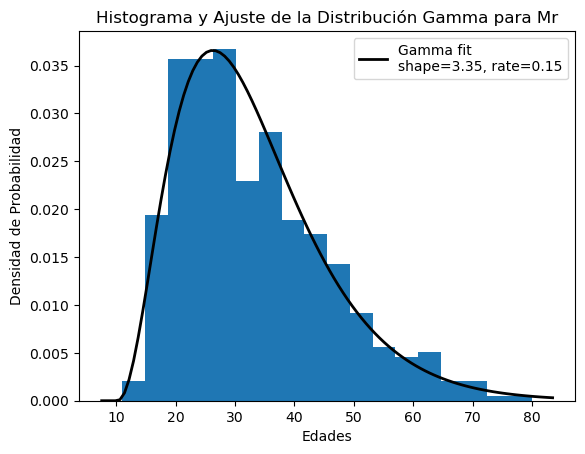

In [10]:

shape, loc, scale = stats.gamma.fit(limpia_edades_mr)
print(stats.kstest(limpia_edades_mr,'gamma',args=(shape,loc,scale)))

plt.hist(limpia_edades_mr, bins='auto', histtype='stepfilled', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p = stats.gamma.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, p, 'k', linewidth=2, label=f'Gamma fit\nshape={shape:.2f}, rate={1/scale:.2f}')
plt.title("Histograma y Ajuste de la Distribución Gamma para Mr")
plt.xlabel("Edades")
plt.ylabel("Densidad de Probabilidad")
plt.legend()


plt.show()

#Lo anterior comprueba que si e una distribución gamma.


C:\Users\Jose\AppData\Local\Temp\ipykernel_37124\94813441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mr['Age'] = edad_mr_sin_nan


(array([0.00204203, 0.0193993 , 0.03573556, 0.03573556, 0.03675657,
        0.02297286, 0.02807794, 0.01888879, 0.01735727, 0.01429422,
        0.00918914, 0.00561559, 0.00459457, 0.00510508, 0.00204203,
        0.00204203, 0.00051051, 0.00051051]),
 array([11.        , 14.83333333, 18.66666667, 22.5       , 26.33333333,
        30.16666667, 34.        , 37.83333333, 41.66666667, 45.5       ,
        49.33333333, 53.16666667, 57.        , 60.83333333, 64.66666667,
        68.5       , 72.33333333, 76.16666667, 80.        ]),
 [<matplotlib.patches.Polygon at 0x21abeae8440>])

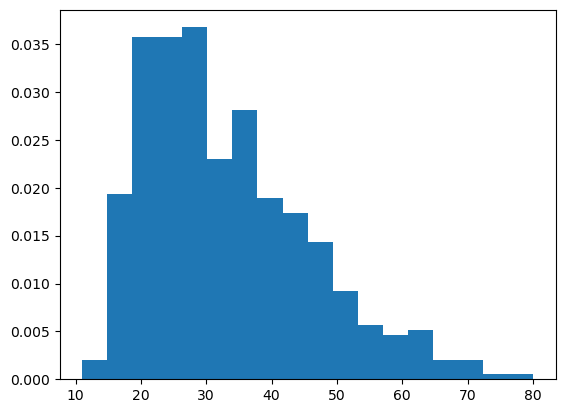

In [11]:
edad_mr_sin_nan = rellenar_nan_con_random_gamma(edades_mr,limpia_edades_mr)
Mr['Age'] = edad_mr_sin_nan
plt.hist(limpia_edades_mr, bins='auto', histtype='stepfilled', density=True)


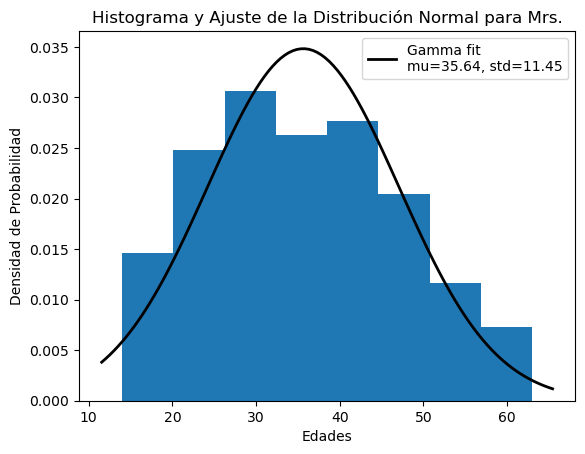

AndersonResult(statistic=0.5966531102627926, critical_values=array([0.557, 0.635, 0.761, 0.888, 1.056]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=35.642857142857146, scale=11.506251448400665)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [12]:
edades_mrs = Mrs["Age"].to_numpy()
edad_max_mrs = max(edades_mrs)
edad_min_mrs = min(edades_mrs)
limpia_edades_mrs = edades_mrs[~np.isnan(edades_mrs)]

plt.hist(limpia_edades_mrs, bins='auto', histtype='stepfilled', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 112)
mu, std = norm.fit(limpia_edades_mrs)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label=f'Gamma fit\nmu={mu:.2f}, std={std:.2f}')
plt.title("Histograma y Ajuste de la Distribución Normal para Mrs.")
plt.xlabel("Edades")
plt.ylabel("Densidad de Probabilidad")
plt.legend()


plt.show()

stats.anderson(limpia_edades_mrs, dist="norm")

(array([0.01423825, 0.01850973, 0.03132416, 0.03274798, 0.03274798,
        0.02135738, 0.01850973, 0.00854295, 0.0056953 ]),
 array([14.        , 19.44444444, 24.88888889, 30.33333333, 35.77777778,
        41.22222222, 46.66666667, 52.11111111, 57.55555556, 63.        ]),
 [<matplotlib.patches.Polygon at 0x21abee80b60>])

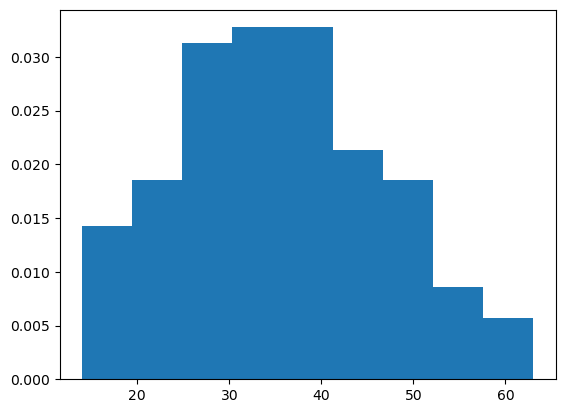

In [13]:
edads_mrs_sin_nan = rellenar_nan_con_random_normal(edades_mrs)

plt.hist(edads_mrs_sin_nan, bins='auto', histtype='stepfilled', density=True)

AndersonResult(statistic=0.5966531102627926, critical_values=array([0.557, 0.635, 0.761, 0.888, 1.056]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=35.642857142857146, scale=11.506251448400665)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

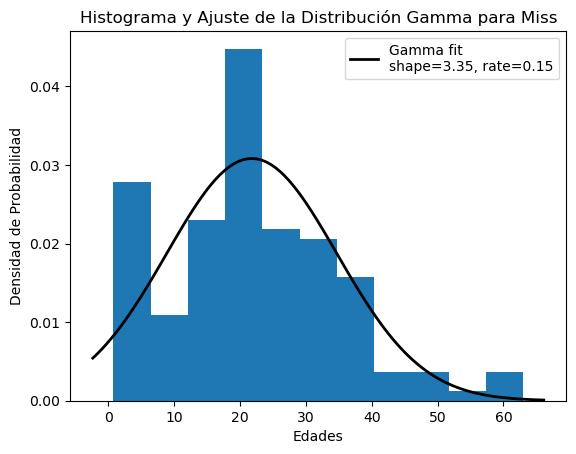

In [14]:
edades_miss = Miss["Age"].to_numpy()
edad_max_miss = max(edades_miss)
edad_min_miss = min(edades_miss)
limpia_edades_miss = edades_miss[~np.isnan(edades_miss)]

plt.hist(limpia_edades_miss, bins='auto', histtype='stepfilled', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(limpia_edades_miss)
p = norm.pdf(x, mu, std)


plt.plot(x, p, 'k', linewidth=2, label=f'Gamma fit\nshape={shape:.2f}, rate={1/scale:.2f}')
plt.title("Histograma y Ajuste de la Distribución Gamma para Miss")
plt.xlabel("Edades")
plt.ylabel("Densidad de Probabilidad")
plt.legend()


stats.anderson(limpia_edades_mrs, dist="norm")

(array([0.02409639, 0.01147447, 0.01376936, 0.02983362, 0.0367183 ,
        0.02409639, 0.02753873, 0.01606426, 0.01147447, 0.00114745,
        0.00688468, 0.00344234, 0.00229489]),
 array([ 0.75      ,  5.53846154, 10.32692308, 15.11538462, 19.90384615,
        24.69230769, 29.48076923, 34.26923077, 39.05769231, 43.84615385,
        48.63461538, 53.42307692, 58.21153846, 63.        ]),
 [<matplotlib.patches.Polygon at 0x21abee99250>])

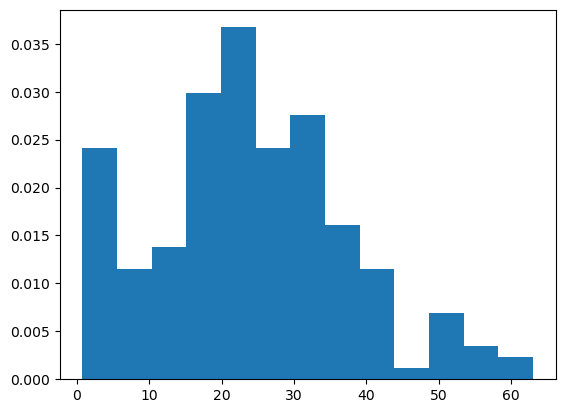

In [15]:
edads_miss_sin_nan = rellenar_nan_con_random_normal(edades_miss)
plt.hist(edads_miss_sin_nan, bins='auto', histtype='stepfilled', density=True)

In [22]:
titles = []
for name in df["Name"]:
    titles.append("".join(re.findall(r',([^.]*)\.', name))[1:])
df["Titles"] = titles
df["Titles"].value_counts()
master_ages = df[df["Titles"] == "Master"]["Age"].dropna()
df[df["Titles"] == "Master"] = df[df["Titles"] == "Master"].fillna(value = master_ages.mean())

In [63]:
i=0
while i != len(edad_mr_sin_nan):
    df[df["Titles"] == "Mr"] = df[df["Titles"] == "Mr"].replace(np.nan,edad_mr_sin_nan[i])
    i=i+1

i=0
while i != len(edads_mrs_sin_nan):
    df[df["Titles"] == "Mrs"] = df[df["Titles"] == "Mrs"].replace(np.nan,edads_mrs_sin_nan[i])
    i=i+1

i=0
while i != len(edads_miss_sin_nan):
    df[df["Titles"] == "Miss"] = df[df["Titles"] == "Miss"].replace(np.nan,edads_miss_sin_nan[i])
    i=i+1

df[df["Name"] == "Brewe, Dr. Arthur Jackson"].replace(np.nan,45)

C:\Users\Jose\AppData\Local\Temp\ipykernel_37124\3979423722.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[df["Name"] == "Brewe, Dr. Arthur Jackson"].replace(np.nan,45)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,45.0,0,0,112379,39.6,45,C,Dr


In [64]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,22.0,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,26.0,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,22.0,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,26.0,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [70]:
df_x = df[["PassengerId", "Pclass", "Sex", "Age", "Parch", "Titles", "Survived"]].copy()
df_x['Mr'] = df_x['Titles'] == 'Mr' # Mr
df_x['Miss'] = (df_x['Titles'] == 'Miss') | (df_x['Titles'] == 'Mlle') | (df_x['Titles'] == 'Ms') # Miss and equivalents
df_x['Mrs'] = df_x['Titles'] == 'Mrs' # Mrs
df_x['Master'] = df_x['Titles'] == 'Master'# Master
df_x['Social Worker'] = (df_x['Titles'] == 'Dr') | (df_x['Titles'] == 'Rev') # Social Workers (Not really)
df_x['Millitary'] = (df_x['Titles'] == 'Major') | (df_x['Titles'] == 'Col') | (df_x['Titles'] == 'Capt') # Millitary
df_x['Nobility'] = (df_x['Titles'] == 'Sir') | (df_x['Titles'] == 'Lady') | (df_x['Titles'] == 'Mme') | (df_x['Titles'] == 'Don') | (df_x['Titles'] == 'Jonkheer') # Nobility
df_x.drop("Titles", axis = 1, inplace = True)
df_y = df_x[["PassengerId", "Survived"]].copy()
df_x.drop("Survived", axis = 1, inplace = True)

# Set indexes to Passanger Id
df_y.set_index("PassengerId", inplace=True)
df_x.set_index("PassengerId", inplace=True)

df_x.loc[df_x["Sex"] == "male", "Sex"] = 0
df_x.loc[df_x["Sex"] == "female", "Sex"] = 1

df_x.to_csv('dfxe.csv', index=False)
df_y.to_csv('dfye.csv', index=False)